In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/time_rating.csv')
df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65720 non-null  object 
 1   start_year       65720 non-null  int64  
 2   runtime_minutes  65720 non-null  float64
 3   genres           65720 non-null  object 
 4   averagerating    65720 non-null  float64
 5   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [5]:
df.genres = df.genres.str.split(',')

In [6]:
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",7.2,43
2,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119
4,Joe Finds Grace,2017,83.0,"[Adventure, Animation, Comedy]",8.1,263
...,...,...,...,...,...,...
65715,Padmavyuhathile Abhimanyu,2019,130.0,[Drama],8.4,365
65716,Swarm Season,2019,86.0,[Documentary],6.2,5
65717,Diabolik sono io,2019,75.0,[Documentary],6.2,6
65718,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",8.7,136


In [7]:
df=df.explode('genres') 

In [8]:
df.to_csv('data/genre_rating.csv', index=False)

In [9]:
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,Action,7.0,77
0,Sunghursh,2013,175.0,Crime,7.0,77
0,Sunghursh,2013,175.0,Drama,7.0,77
1,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43
1,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...
65716,Swarm Season,2019,86.0,Documentary,6.2,5
65717,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
65718,Sokagin Çocuklari,2019,98.0,Family,8.7,136


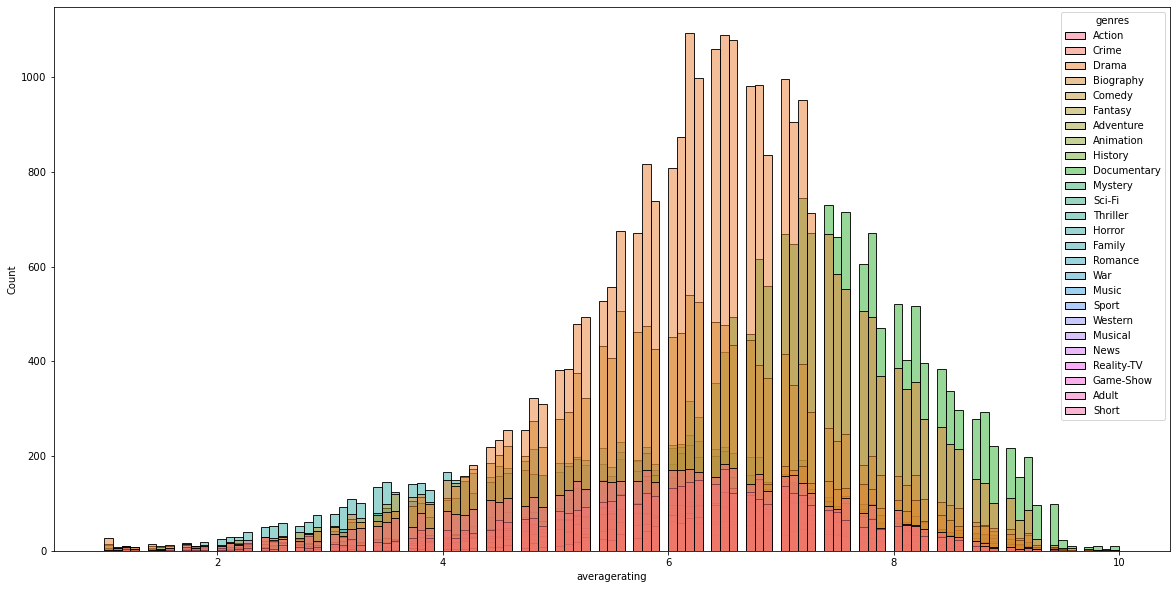

In [45]:
fig, ax = plt.subplots(figsize = (20,10))
sns.histplot(data=df, x="averagerating", hue="genres");

In [ ]:
# full_frame = pd.DataFrame()
# for idx in df.index:
#     row = df.loc[idx]
#     genres = row.genres
#     frame = pd.DataFrame()
#     for genre in genres:
#         new_row = row.copy()
#         row.genres = genre
#         frame = frame.append(row)
#     full_frame = full_frame.append(frame)

In [28]:
frame.append(row)

,averagerating,genres,numvotes,primary_title,runtime_minutes,start_year
0,7.0,Action,77.0,Sunghursh,175.0,2013.0


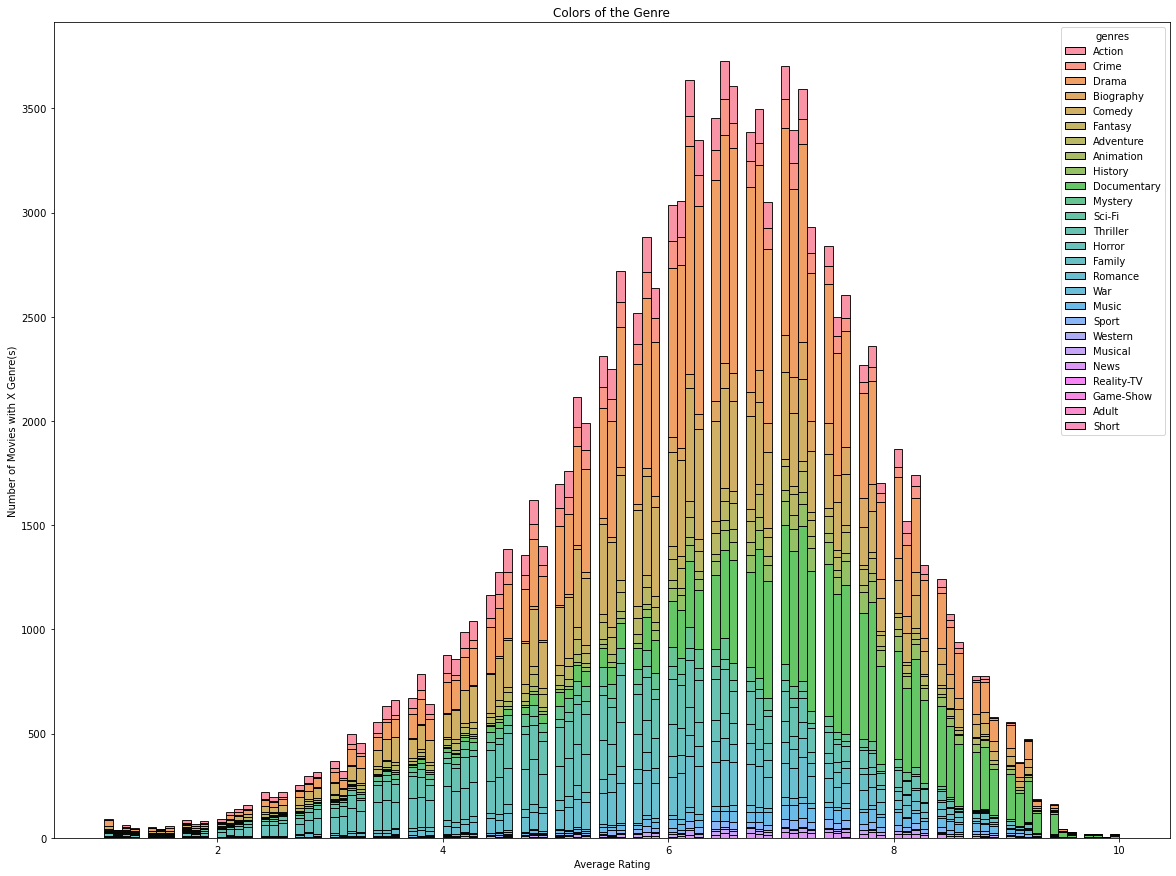

In [13]:
fig, ax = plt.subplots(figsize = (20,15))
sns.histplot(data=df, x="averagerating", hue="genres", multiple="stack")
ax.set_title('Colors of the Genre')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Movies with X Genre(s)');